In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [244]:
data=pd.read_csv('diabetes.csv')

In [245]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [246]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [248]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [249]:
data.duplicated().sum()

0

In [250]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, 'Distribution of Diabetes')

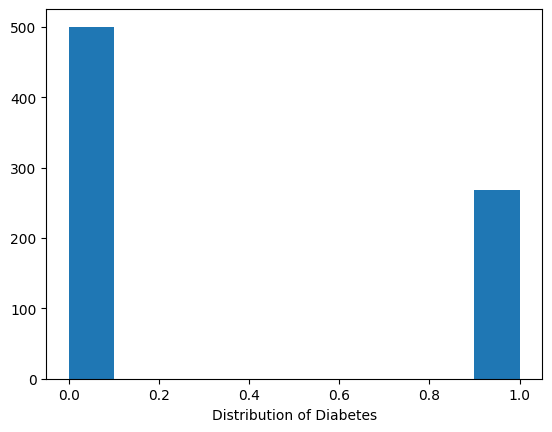

In [251]:
#analysis
plt.hist(data['Outcome'])
plt.xlabel("Distribution of Diabetes")


Text(0.5, 0, 'Distribution of chances of diabetes')

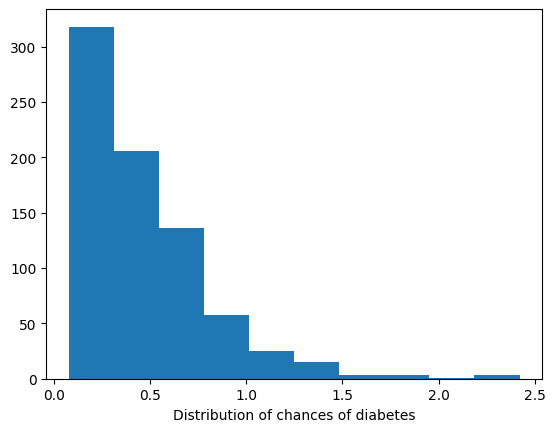

In [252]:
plt.hist(data['DiabetesPedigreeFunction'])
plt.xlabel("Distribution of chances of diabetes")

Text(0.5, 1.0, 'Glucose distribution')

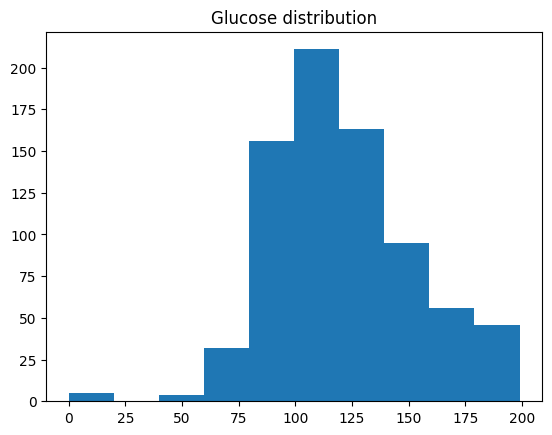

In [253]:
plt.hist(data['Glucose'])
plt.title("Glucose distribution")

<Axes: xlabel='DiabetesPedigreeFunction'>

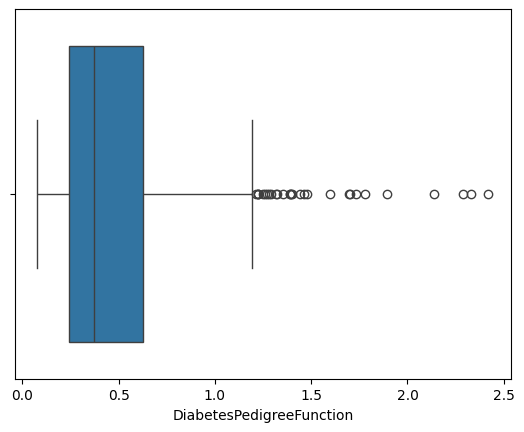

In [254]:
sns.boxplot(data,x='DiabetesPedigreeFunction')

Text(0.5, 1.0, 'Distibution of diabetes vs age')

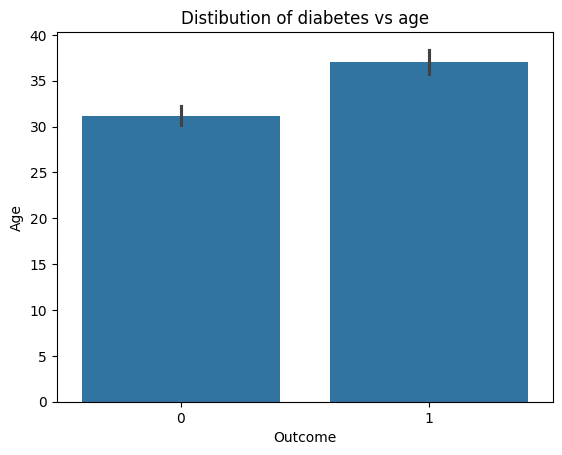

In [255]:
sns.barplot(data,x='Outcome',y='Age')
plt.title("Distibution of diabetes vs age")

Text(0.5, 1.0, 'Distribution of Pregencies vs diabetes')

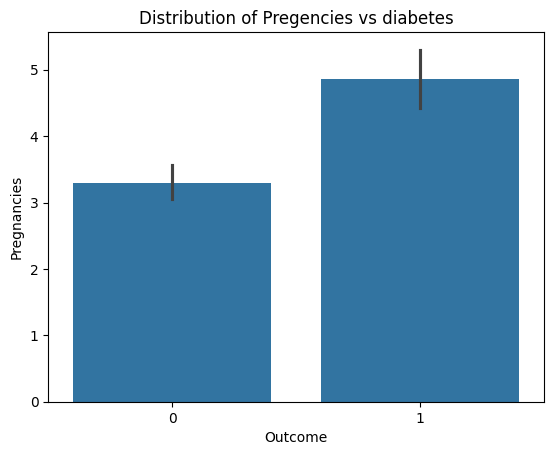

In [256]:
sns.barplot(data,x='Outcome',y='Pregnancies')
plt.title("Distribution of Pregencies vs diabetes")

Text(0.5, 1.0, 'Distribution of chances of diabetes')

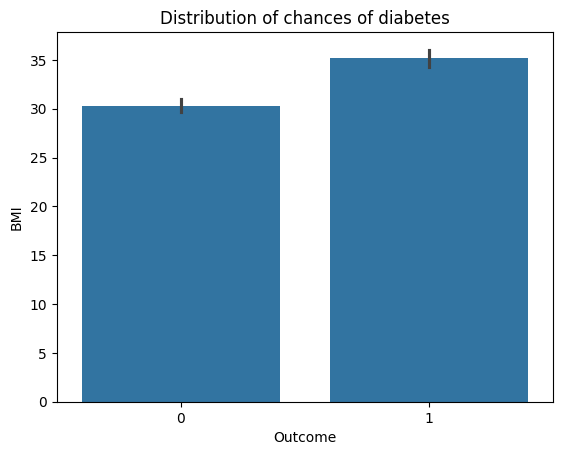

In [257]:
sns.barplot(data,x='Outcome',y='BMI')
plt.title("Distribution of chances of diabetes")

Text(0.5, 1.0, 'Distribution of chances of diabetes')

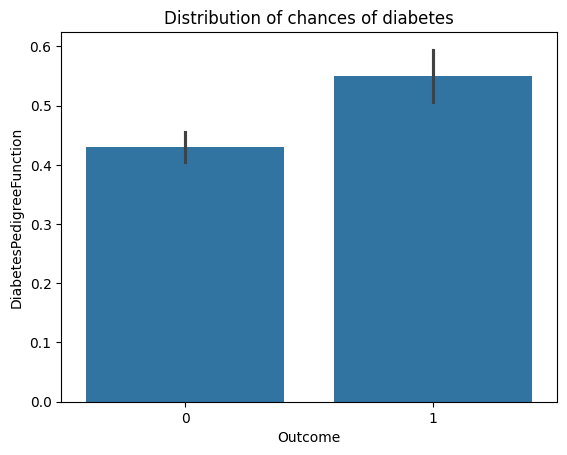

In [258]:
sns.barplot(data,x='Outcome',y='DiabetesPedigreeFunction')
plt.title("Distribution of chances of diabetes")

<Axes: xlabel='Outcome', ylabel='Glucose'>

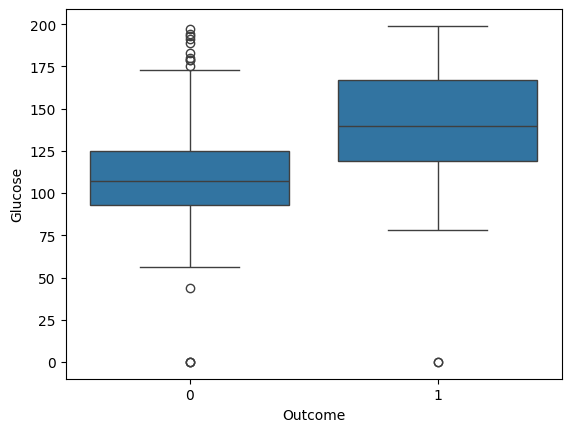

In [259]:
sns.boxplot(data,x='Outcome',y='Glucose')

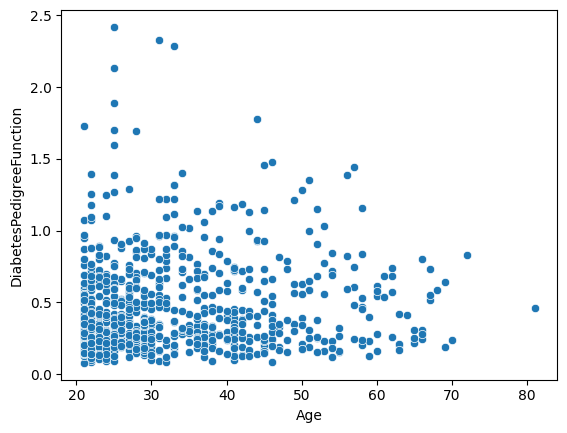

In [260]:
 sns.scatterplot(data=data, x='Age', y='DiabetesPedigreeFunction')
plt.show()


<Axes: xlabel='Glucose', ylabel='BMI'>

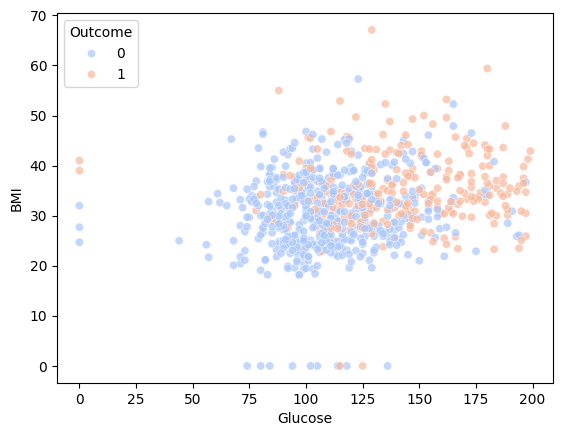

In [261]:
sns.scatterplot(data, x="Glucose", y="BMI", hue="Outcome", palette="coolwarm", alpha=0.7)


<Axes: xlabel='Outcome', ylabel='Insulin'>

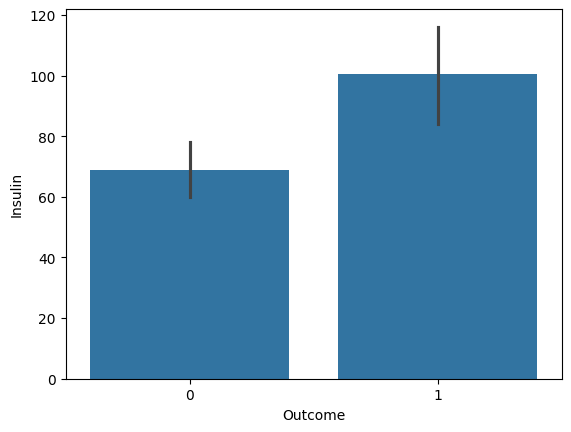

In [262]:
sns.barplot(data,x='Outcome',y='Insulin')

<Axes: >

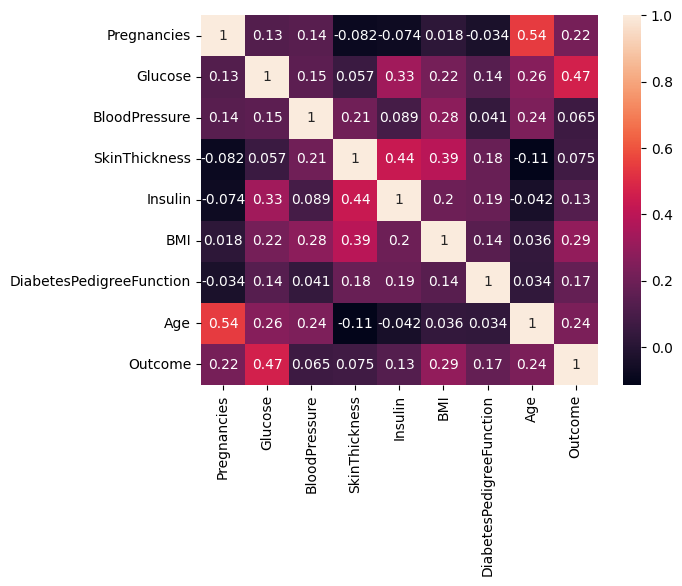

In [263]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='BMI'>

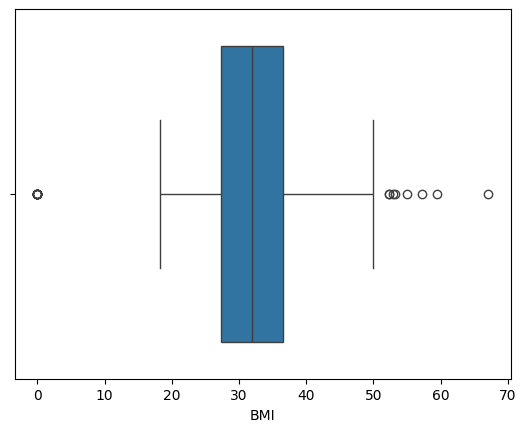

In [264]:
sns.boxplot(data,x='BMI')

<Axes: xlabel='DiabetesPedigreeFunction'>

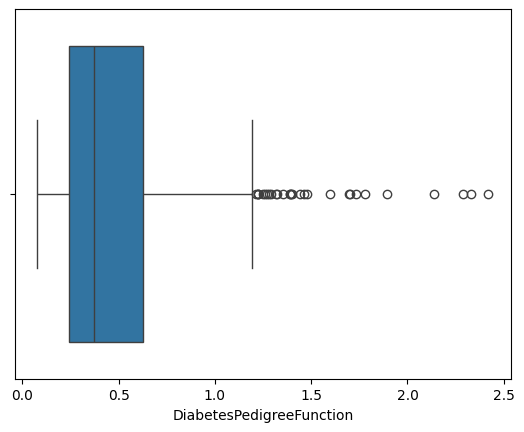

In [265]:
sns.boxplot(data,x='DiabetesPedigreeFunction')

In [266]:
#handling outlier
q1=data['DiabetesPedigreeFunction'].quantile(.25)
q3=data['DiabetesPedigreeFunction'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr

data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].apply(lambda x:lowerbound if x<=lowerbound else upperbound if x>=upperbound else x)

<Axes: xlabel='DiabetesPedigreeFunction'>

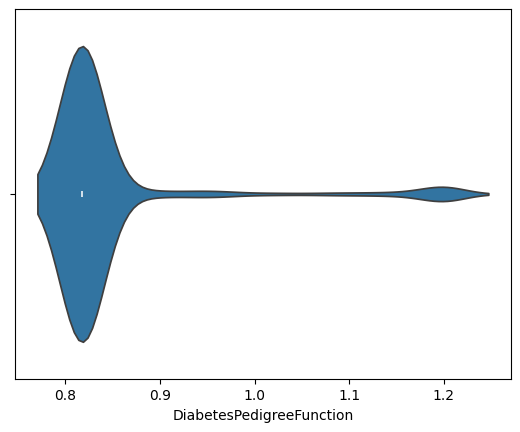

In [267]:
sns.violinplot(data,x='DiabetesPedigreeFunction')

In [268]:
q1=data['BMI'].quantile(.25)
q3=data['BMI'].quantile(.75)
iqr=q3-q1

lowerbound=q1+1.5*iqr
upperbound=q3+1.5*iqr

data['BMI']=data['BMI'].apply(lambda x:lowerbound if x<=lowerbound else upperbound if x>=upperbound else x)

<Axes: xlabel='BMI'>

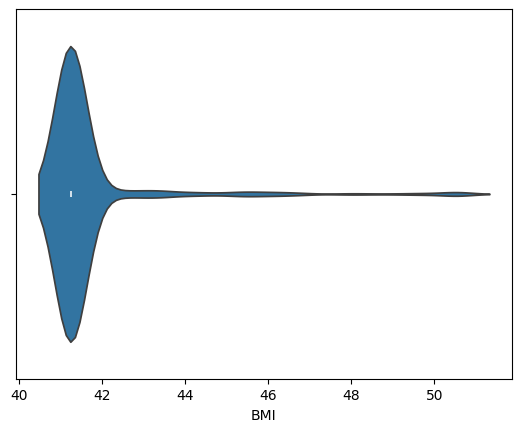

In [269]:
sns.violinplot(data,x='BMI')

In [270]:
data=data.drop(columns=['Pregnancies'])

In [271]:
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,41.25,0.8175,50,1
1,85,66,29,0,41.25,0.8175,31,0
2,183,64,0,0,41.25,0.8175,32,1
3,89,66,23,94,41.25,0.8175,21,0
4,137,40,35,168,43.10,1.2000,33,1


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [273]:
scaler = StandardScaler()
numerical_cols = ['Glucose', 'BloodPressure','SkinThickness','Insulin' ,'BMI','DiabetesPedigreeFunction','Age','Outcome']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [275]:
X=data.drop(columns=['Outcome'])
y = data['Outcome'].astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(n_estimators=100,random_state=40)
model.fit(X_train,y_train)

y_predict=model.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)

print(f"model Accuracy:{accuracy*100:2f}%")
print("\nClassification Report:")
print(classification_report(y_test,y_predict))

model Accuracy:74.675325%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

